<a href="https://colab.research.google.com/github/putuwinda/Assignment7-DTI-Clustering/blob/main/Assignment7_DTI_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Ni Putu Winda Ardiyanti

ID : DS0123

**Clustering using Kmeans Method**

the dataset that will be clustered are from kaggle, in this project we are tryiing to clustered people based on the annual income and its spending rate(1-100)
there are 5 clusters that exist on the clustering.
- cluster 0 = 23 data ( annual income between 15-29, spending rate between 4 - 29)
- cluster 1 = 35 data (annual income between 70-137, spending rate between 1-39)
- cluster 2 = 81 data (annual income between 39-76, spending rate between 34 - 61)
- cluster 3 = 39 data (annual income between 69-137, spending rate between 68-97)
- cluster 4 = 22 data (annual income between 15-39, spending rate between 61 - 99)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id = '1qh3DjDDeoS98kxvyWnQp5sSEtaRkP-0F'
print (id) # Verify that you have everything after '='

1qh3DjDDeoS98kxvyWnQp5sSEtaRkP-0F


In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Mall_Customers.csv')  
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA
in this phase, we define the missing value, drop the column that did not use for the clustering, and also normalize the dataset value using standar scaler

In [9]:
pip install missingno

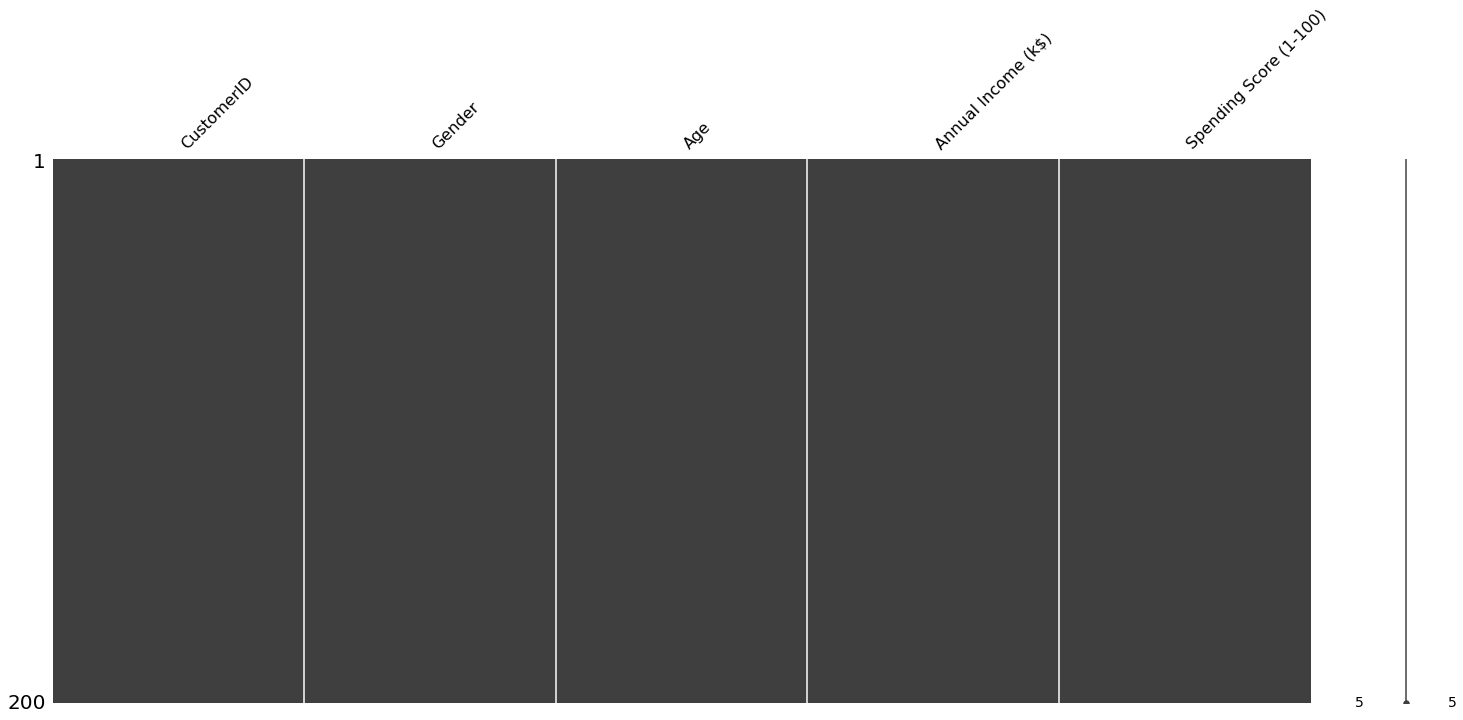

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

drop unnecessary column

In [12]:
# drop some columns
df = df.drop(columns=['CustomerID', 'Gender','Age'])

In [13]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


data normalization using standard scaler

In [15]:
from sklearn.preprocessing import StandardScaler
#assign the StandardScaler()
scaler = StandardScaler()
newarr = scaler.fit_transform(df)
newarr

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [18]:
# change the normalize result to the dataframe
#change newarr to xdf
xdf =pd.DataFrame(data = newarr,columns=['Annual Income (k$)','Spending Score'])
xdf

,Annual Income (k$),Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Data ploting 

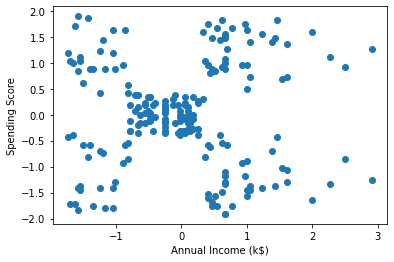

In [19]:
#import the library, and plot the data 
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(xdf['Annual Income (k$)'], xdf['Spending Score'], 'o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [20]:
#change our previous dataframe into array
#change xdf to newdf
#import the numpy library

import numpy as np
newdf = np.array(xdf)
newdf

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Kmeans Process

Define the elbow method

from the elbow method, we know that the optimal k is 5

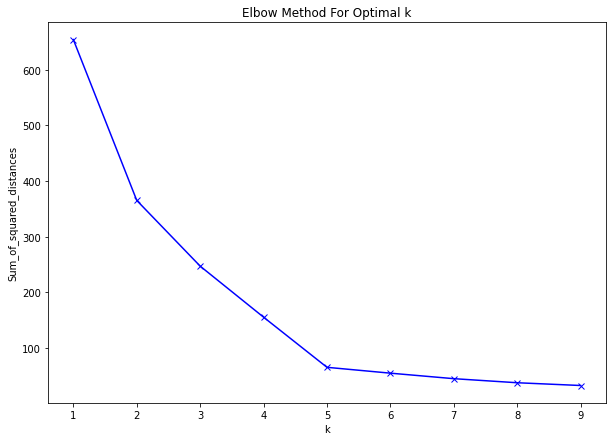

In [42]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xdf)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

begin the clustering, in this phase the clustering process are using kmeans algorithm

so, we need to import the Kmeans library first.

In [43]:
from sklearn.cluster import KMeans
#we import the library and clusters the data
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(xdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [44]:
#print the centroids of the  clustering
print(kmeans.cluster_centers_)

[[-1.30751869e+00 -1.13696536e+00  1.33226763e-15]
 [ 9.91583048e-01  1.23950275e+00  3.00000000e+00]
 [-2.00912566e-01 -2.64561747e-02  2.00000000e+00]
 [ 1.05500302e+00 -1.28443907e+00  1.00000000e+00]
 [-1.32954532e+00  1.13217788e+00  4.00000000e+00]]


In [45]:
# present our cluster results and save it to the dataframe
print(kmeans.labels_)
xdf['Clusters'] = kmeans.labels_
xdf

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


,Annual Income (k$),Spending Score,Clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


In [52]:
# present our cluster restult and save it to the dataframe
print(kmeans.labels_)
xdf['Clusters'] = kmeans.labels_
xdf

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


,Annual Income (k$),Spending Score,Clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


Cluster's Visualization

<Figure size 1872x1728 with 0 Axes>

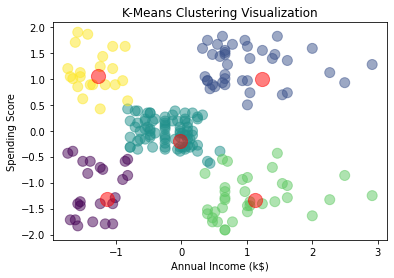

In [54]:
plt.figure(figsize=(26,24))
fig, ax = plt.subplots()
sct=ax.scatter(xdf['Annual Income (k$)'], xdf['Spending Score'], s = 100,c = xdf['Clusters'], marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='red', s=200, alpha=0.5);plt.title("K-Means Clustering Visualization")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

on the figure above we get the result of the clustering visualization, where:
- the purple is the cluster 0,
- dark blue are cluster 1,
- yellow are cluster 2,
- green are cluster 3, 
- and dark green(on the center) are cluster 4.

In [55]:
xdf['Clusters'].value_counts()

2    81
1    39
3    35
0    23
4    22
Name: Clusters, dtype: int64

print the clusters result on the dataset that is not normalized yet, to easy to understand the data

In [57]:
# present our cluster restult and save it to the dataframe
print(kmeans.labels_)
df['Clusters'] = kmeans.labels_
df

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [66]:
#save the clustering value to the csv file
df.to_csv('clusteringresult.csv')